In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score



In [2]:
df=pd.read_csv("diabetes.csv")

In [3]:
df.shape

(768, 9)

In [4]:
df.head(50)

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   pregnancies  768 non-null    int64  
 1   glucose      768 non-null    int64  
 2   diastolic    768 non-null    int64  
 3   triceps      768 non-null    int64  
 4   insulin      768 non-null    int64  
 5   bmi          768 non-null    float64
 6   dpf          768 non-null    float64
 7   age          768 non-null    int64  
 8   diabetes     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
col=df.columns
col

Index(['pregnancies', 'glucose', 'diastolic', 'triceps', 'insulin', 'bmi',
       'dpf', 'age', 'diabetes'],
      dtype='object')

In [7]:
col=['pregnancies', 'glucose', 'diastolic', 'triceps', 'insulin', 'bmi',
       'dpf', 'age']

In [8]:
# split x (input )
x=df[col]
x

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [9]:
# split y output:
y=df['diabetes']
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: diabetes, Length: 768, dtype: int64

In [10]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.7,train_size=0.3,random_state=0,)

In [11]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


(230, 8)
(538, 8)
(230,)
(538,)


In [12]:
# calling logistic regession function
logisticregression=LogisticRegression()

In [13]:
# fit the model
logisticregression.fit(x_train,y_train)

C:\Users\abdul saboor\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [14]:
# testing the model on the data 
y_predict=logisticregression.predict(x_test)

In [15]:
# checking accuracy of model 
accuracy_score(y_predict,y_test)

0.7769516728624535

In [16]:
# lets try giving one custome input:
testdata=[6,144,74,33,1,35.6,0.427,50]

if(logisticregression.predict([testdata])==1):
    print("the person have diabetes ");
else:
    print("the person does not have diabetes");    

the person have diabetes 


C:\Users\abdul saboor\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [17]:
# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_predict)
conf_matrix

array([[313,  34],
       [ 86, 105]], dtype=int64)

In [18]:
# Calculate the ROC curve
y_pred_prob = logisticregression.predict_proba(x_test)[:, 1]
y_pred_prob

array([0.95644754, 0.20571748, 0.12702441, 0.53939522, 0.14111723,
       0.05847372, 0.7654327 , 0.82557599, 0.4293565 , 0.33729396,
       0.56468824, 0.93202941, 0.30546628, 0.26931343, 0.20051477,
       0.19992209, 0.83411668, 0.0343224 , 0.41969548, 0.26170425,
       0.67516038, 0.4957812 , 0.14915365, 0.10187019, 0.06745055,
       0.36712278, 0.07028171, 0.93150839, 0.13494291, 0.16654379,
       0.44983193, 0.28203092, 0.14932215, 0.42743951, 0.09273685,
       0.58843725, 0.49135832, 0.1349607 , 0.27302578, 0.64324145,
       0.29803045, 0.30677433, 0.18874781, 0.75747743, 0.49577423,
       0.01833739, 0.09710163, 0.19131665, 0.42472967, 0.36204568,
       0.40437094, 0.18240467, 0.85529599, 0.56646343, 0.15239653,
       0.00563441, 0.08376376, 0.63010134, 0.29882133, 0.04412683,
       0.72634454, 0.41327308, 0.11503077, 0.49733286, 0.61528449,
       0.89233077, 0.69290926, 0.15603251, 0.33421951, 0.18147716,
       0.13517086, 0.20768581, 0.12756478, 0.9559326 , 0.80718

In [19]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
print("false positive rate : \n",fpr)
print("true positive rate : \n",tpr)
print("threash hold :\n: ",thresholds)

false positive rate : 
 [0.         0.         0.00288184 0.00288184 0.00576369 0.00576369
 0.00864553 0.00864553 0.01152738 0.01152738 0.01440922 0.01440922
 0.02017291 0.02017291 0.02305476 0.02305476 0.0259366  0.0259366
 0.02881844 0.02881844 0.03170029 0.03170029 0.03458213 0.03458213
 0.04610951 0.04610951 0.04899135 0.04899135 0.05475504 0.05475504
 0.05763689 0.05763689 0.06051873 0.06051873 0.06340058 0.06340058
 0.06916427 0.06916427 0.07204611 0.07204611 0.07492795 0.07492795
 0.0778098  0.0778098  0.08069164 0.08069164 0.08645533 0.08645533
 0.08933718 0.08933718 0.09221902 0.09221902 0.09798271 0.09798271
 0.1037464  0.1037464  0.10662824 0.10662824 0.11239193 0.11239193
 0.12391931 0.12391931 0.13544669 0.13544669 0.13832853 0.13832853
 0.14121037 0.14121037 0.14985591 0.14985591 0.15273775 0.15273775
 0.15850144 0.15850144 0.17291066 0.17291066 0.17867435 0.17867435
 0.20172911 0.20172911 0.24495677 0.24495677 0.25360231 0.25360231
 0.25648415 0.25648415 0.26801153 0.268

In [20]:

# Calculate the AUC (Area Under the Curve) for ROC
roc_auc = roc_auc_score(y_test, y_pred_prob)
roc_auc

0.8361573396502558

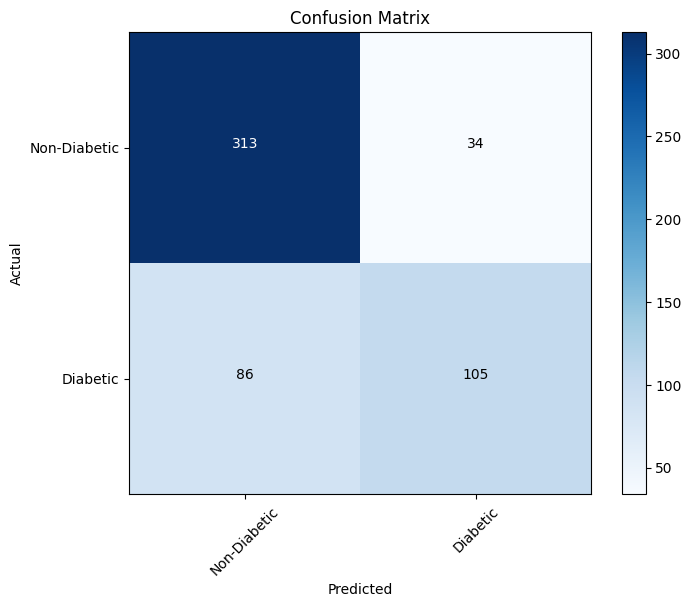

In [21]:
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.get_cmap('Blues'))
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['Non-Diabetic', 'Diabetic'], rotation=45)
plt.yticks(tick_marks, ['Non-Diabetic', 'Diabetic'])
plt.xlabel('Predicted')
plt.ylabel('Actual')

for i in range(2):
    for j in range(2):
        plt.text(j, i, format(conf_matrix[i, j], 'd'),
                 horizontalalignment="center", color="white" if conf_matrix[i, j] > conf_matrix.max() / 2. else "black")

plt.show()


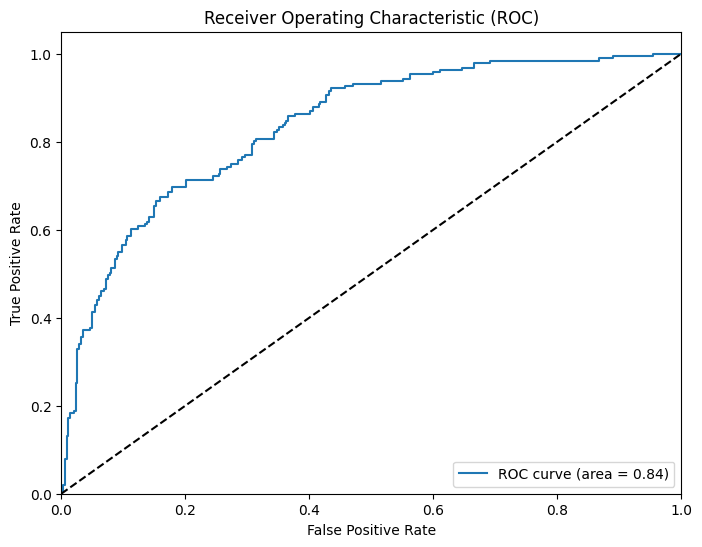

In [22]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()
